**CREDIT CARD FRAUD DETECTION SCRIPT**

**IMPORTING DATA**

Class
0    284315
1       492
Name: count, dtype: int64


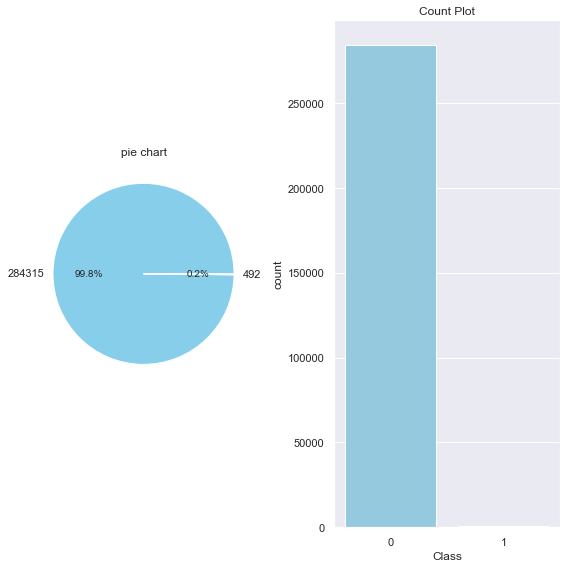

correlation
             Time     Class
Time   1.000000 -0.012323
Class -0.012323  1.000000


C:\Users\Omolayo-Akinola\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



mutual information score
 Time    0.01038
Name: Mi score, dtype: float64

probability of fraud
 0.001727485630620034


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
142883,84996.0,-0.683185,0.318044,1.253572,-0.619177,-0.117377,1.421855,-1.182254,-2.287845,-0.488407,-1.213592,0.47519,1.004987,0.54697,0.42594,0.493851,1.313362,-1.100426,0.357849,-0.91162,0.864637,-1.225736,0.147587,-0.38349,-1.120999,1.150326,0.478094,-0.042703,0.168681,127.48,0


In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
sns.set()

pd.set_option('display.max_columns',None)

file = r'C:\Users\Omolayo-Akinola\Documents\D1team\creditcard D1 team.csv'

data = pd.read_csv(file) 

#inspeacting data 

# getting overview
# print(data.info())

#checking for class imbalance
print(data['Class'].value_counts())

#visualizing class distribution
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(8,8))

#piechart
axes[0].pie(data['Class'].value_counts(),autopct='%1.1f%%',labels = data['Class'].value_counts(),colors=['skyblue','lightcoral'])
axes[0].set_title('pie chart')

#distribution chart
sns.countplot(x=data['Class'], ax=axes[1],palette = sns.color_palette(['skyblue','lightcoral']))
axes[1].set_title('Count Plot')

plt.tight_layout()
plt.show()

#checking for relationship between time and class
#correlation
print("correlation\n ",data[['Time','Class']].corr())

#mutual information score
mi_score = mutual_info_classif(data[['Time']],data[['Class']],discrete_features=True)
mi_score = pd.Series(mi_score,index = data[['Time']].columns,name='Mi score')
mi_score = mi_score.sort_values(ascending=True)
print("\nmutual information score\n",mi_score)

#calculating probability of getting frauded
fraud_prob = data['Class'].sum() / len(data['Class'])
print("\nprobability of fraud\n",fraud_prob)
#checking data structure
data.sample()


**DATA SPLITTING**

In [2]:

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
import re 

#duplicating original
copy = data.copy()

#converting to lower case
copy.columns = [x.lower() for x in copy.columns]

#target
target = copy['class']

# features
features = [x for x in copy.columns if re.search('v\d',x)]

features = copy[features]

features.columns

#splitting data
X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.2,random_state=0)


**CHECKING FOR DISTRIBUTION AND DOWNCASTING**

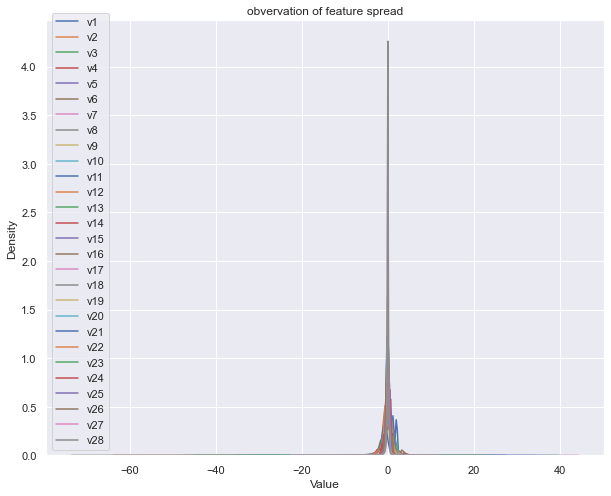

					VISUALIZATION


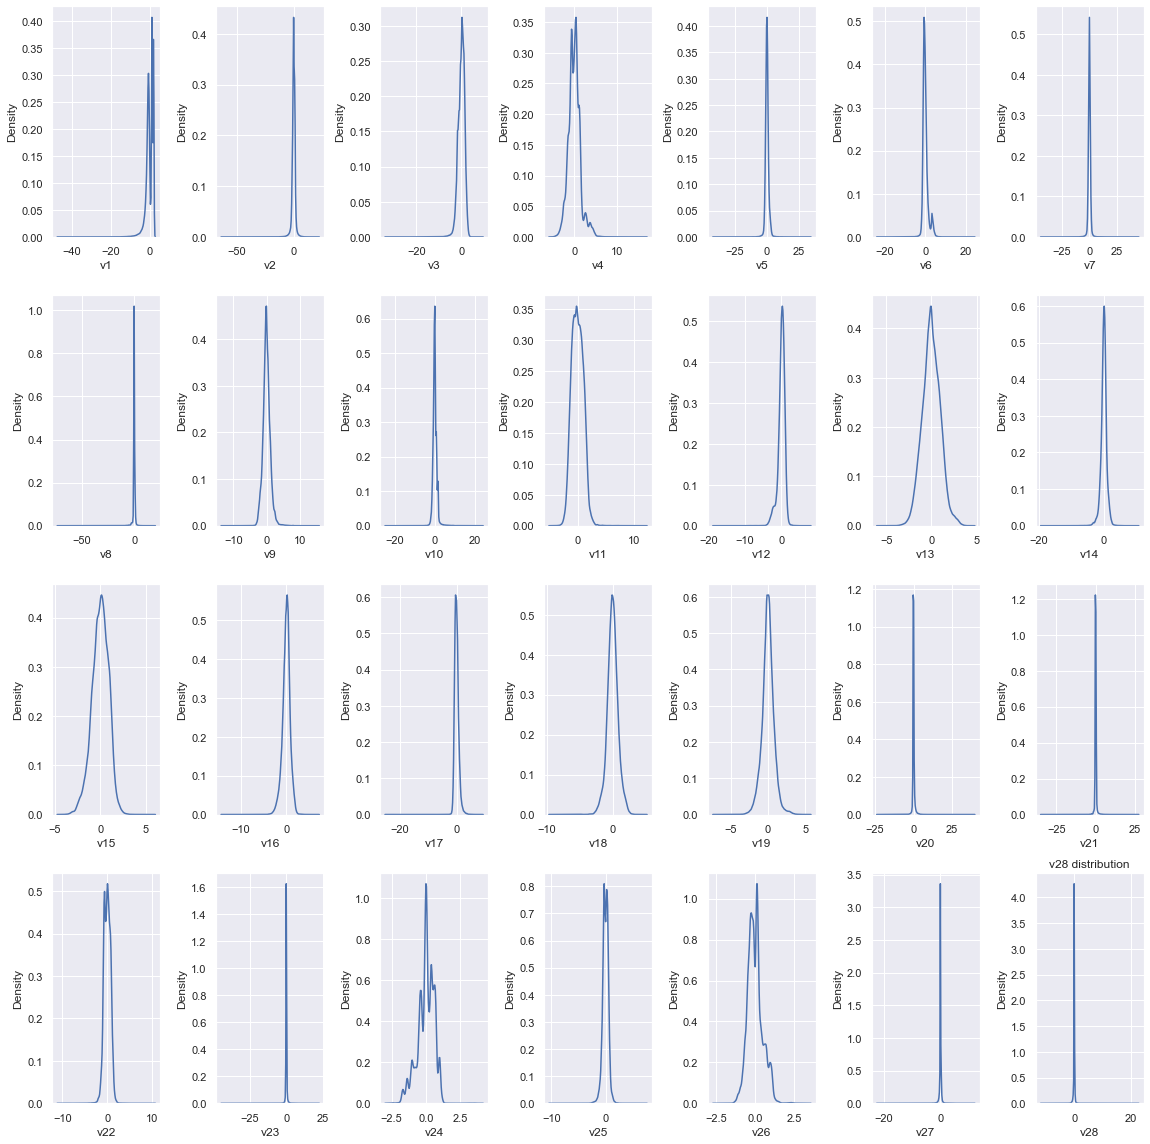

					numeric representation


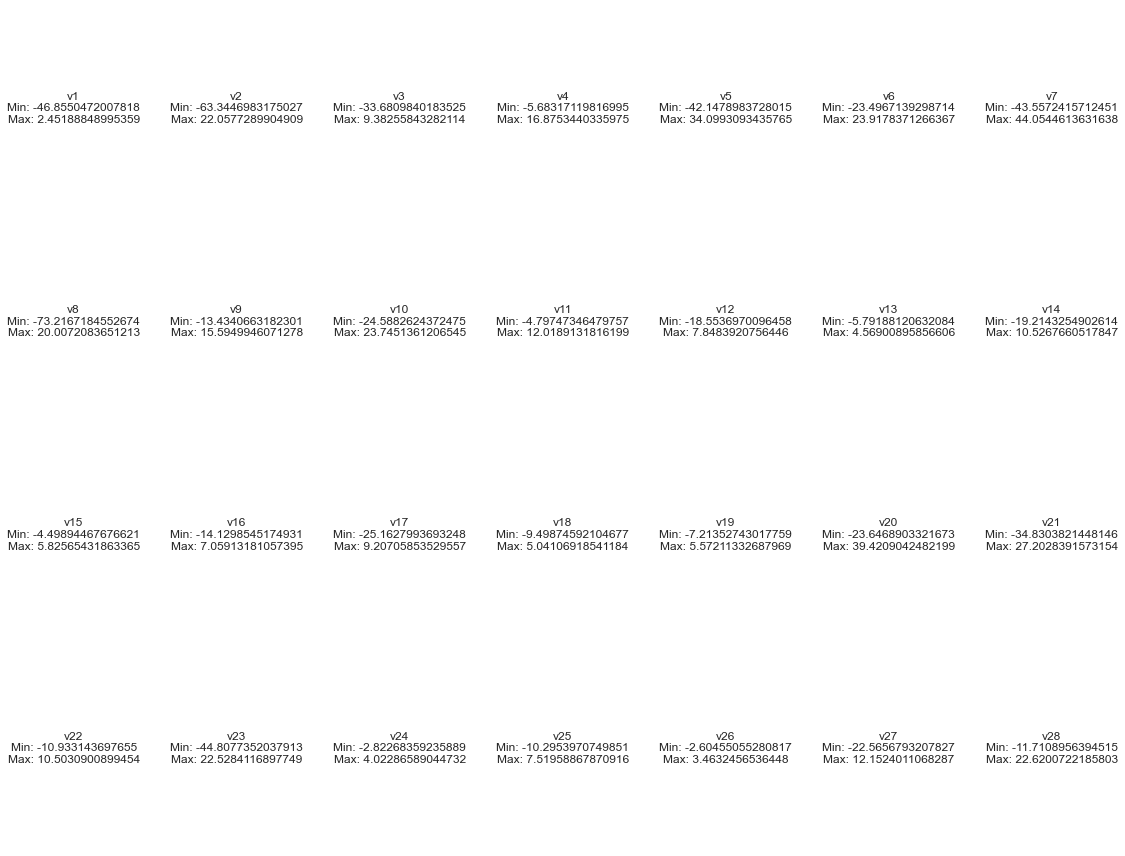

In [3]:

#visualization
#visualizing distribution of data in each feature
plt.figure(figsize=(10,8))
for each in X_train.columns:
    sns.kdeplot(x=X_train[each],label=each)
plt.title('obvervation of feature spread')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

#seperating plots seeing as initial plot seems unreadable
fig,axes = plt.subplots(nrows=4,ncols=7,figsize = (16,16))
axes= axes.flatten()

print("\t\t\t\t\tVISUALIZATION")
for i,each in enumerate(X_train.columns):
    sns.kdeplot(x=X_train[each],ax = axes[i])
    plt.title(f'{each} distribution')

plt.tight_layout()
plt.show()


#numeric representation
print("\t\t\t\t\tnumeric representation")
# Set up a grid of subplots (adjust nrows and ncols as per the number of columns)
fig, axes = plt.subplots(nrows=4, ncols=7, figsize=(16, 12))
axes = axes.flatten()  # Flatten the 4x7 grid into a 1D array for easier access

# Iterate over each feature and corresponding axis
for i, each in enumerate(X_train.columns):
    # Get min and max values of each column
    min_value = X_train[each].min()
    max_value = X_train[each].max()
    
    # Display min/max values in text form on the subplot
    axes[i].text(0.5, 0.5, f'{each}\nMin: {min_value}\nMax: {max_value}',
                 horizontalalignment='center', verticalalignment='center',
                 fontsize=12, transform=axes[i].transAxes)
    
    # Hide background by removing axes spines
    for spine in axes[i].spines.values():
        spine.set_visible(False)
    
    # Remove ticks and set face color to white (or transparent)
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    axes[i].set_facecolor('white')  # You can set this to 'none' for transparent background

# Hide any unused subplots if X_train.columns < 28 (4x7 = 28)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


**DOWNCASTING**

In [33]:
X_train = X_train.apply(lambda col: pd.to_numeric(col, downcast='float'))

**BASE MODEL AND PERFORMANCE EVALUATION**

**RELEVANT LIBRARIES**

In [5]:
from imblearn.combine import SMOTETomek
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix

**BASE MODEL**

In [34]:
#defining model
model = GradientBoostingClassifier(n_estimators=100,random_state=0)
model.fit(X_train,y_train)
predict = model.predict(X_test)

**EVALUATION**

0.7894900511760671 



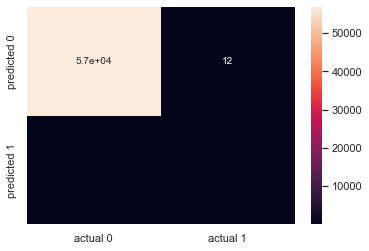

,actual 0,actual 1
predicted 0,56849,12
predicted 1,33,68


In [39]:
from mymod import skf_val_score
#using stratified cross validation score
scoring = skf_val_score(model,X_train,y_train)
print(scoring,'\n')

#using confusion matrix
cm = confusion_matrix(y_test,predict)
cm = pd.DataFrame(cm,columns=['actual 0','actual 1'], index = ['predicted 0','predicted 1'])

sns.heatmap(cm,annot=True,color='skyblue')
cm

**FEATURE SELECTION**

**FEATURE IMPORTANCE**

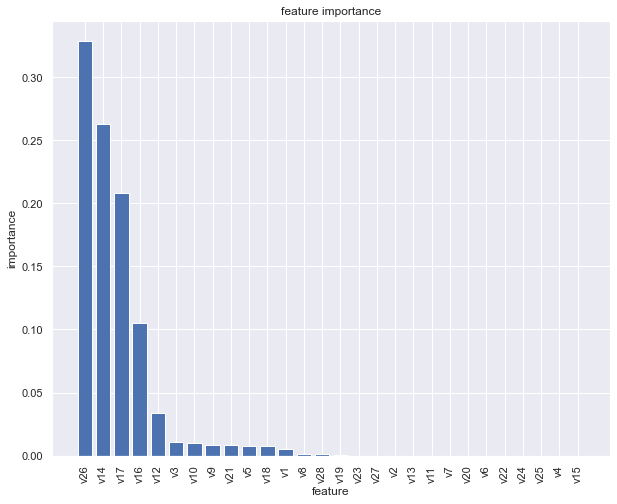

Text(0, 0.5, 'importance')

In [8]:
ft_impt = model.feature_importances_

ft_impt = pd.Series(ft_impt,index=X_train.columns)
ft_impt = ft_impt.sort_values(ascending=False)

plt.figure(figsize=(10,8))
plt.bar(ft_impt.index,ft_impt.values)
plt.title('feature importance')
plt.xticks(rotation=90)
plt.xlabel('feature')
plt.ylabel('importance')

**PERMUTATION IMPORTANCE**

In [9]:
from sklearn.inspection import permutation_importance as PI
import numpy as np 

result = PI(
    estimator=model,
    X=X_test,
    y=y_test,
    n_repeats = 50,
    random_state=0,
    scoring='matthews_corrcoef'
)

**EXAMINING RANKING**

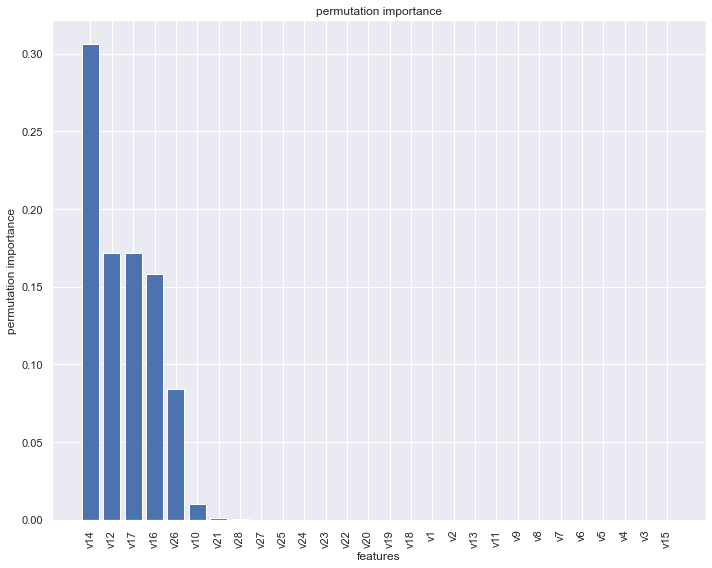

v14    0.305997
v12    0.171760
v17    0.171507
v16    0.158250
v26    0.083882
v10    0.009736
v21    0.001059
v28    0.000257
v27    0.000000
v25    0.000000
v24    0.000000
v23    0.000000
v22    0.000000
v20    0.000000
v19    0.000000
v18    0.000000
v1     0.000000
v2     0.000000
v13    0.000000
v11    0.000000
v9     0.000000
v8     0.000000
v7     0.000000
v6     0.000000
v5     0.000000
v4     0.000000
v3     0.000000
v15    0.000000
dtype: float64

In [10]:
PI_result = pd.Series(result['importances_mean'],index=X_train.columns)
pi_result = PI_result.sort_values(ascending=False)

plt.figure(figsize=(10,8))
plt.bar(pi_result.index,pi_result.values)
plt.title('permutation importance')
plt.xticks(pi_result.index,rotation=90)
plt.xlabel('features')
plt.ylabel('permutation importance')

plt.tight_layout()
plt.show()

pi_result


**SELECTED FEATURES**

In [36]:
selected = PI_selected =list( pi_result[pi_result.values>0.000000].index)

X_train_VP = X_train[selected]

X_test_VP = X_test[selected]


**SECOND MODEL**

In [37]:
#oversampling to balance the dataset
samp = SMOTETomek(sampling_strategy=0.4,random_state=0)
X_train_Re , y_train_Re = samp.fit_resample(X_train_VP,y_train)

#fitting the model again
model.fit(X_train_Re,y_train_Re)
pred = model.predict(X_test_VP)


**EVALUATION**

In [38]:
#using stratified K-fold
score = skf_val_score(model,X_train_Re,y_train_Re)
score

0.9240442849562589

**THE BELOW IS IRRELEVANT**

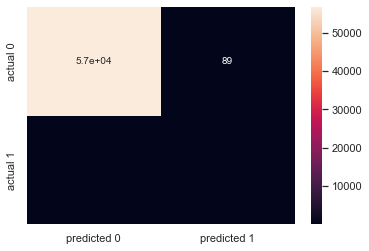

,predicted 0,predicted 1
actual 0,56772,89
actual 1,14,87


In [112]:
#using confusion matrix to evaluate on selected features
Cmatrix = confusion_matrix(y_test,pred)
Cmatrix = pd.DataFrame(Cmatrix,index=['actual 0','actual 1'],columns=['predicted 0','predicted 1'])

#visualiing it
sns.heatmap(Cmatrix,annot=True)
Cmatrix